In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

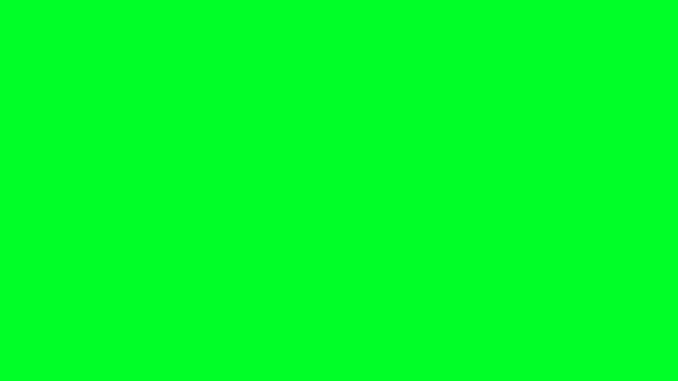

In [3]:
cv2_imshow(bg1_image)

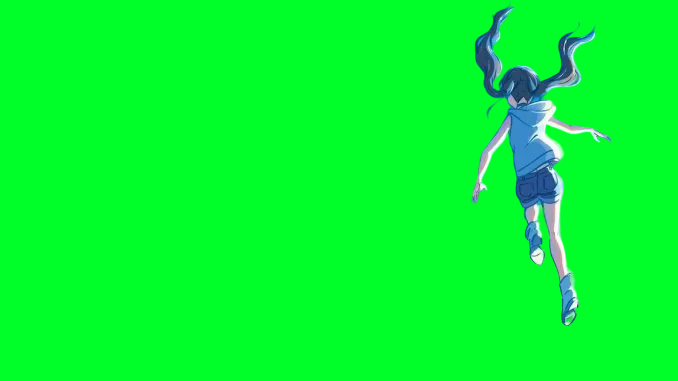

In [4]:
cv2_imshow(ob_image)

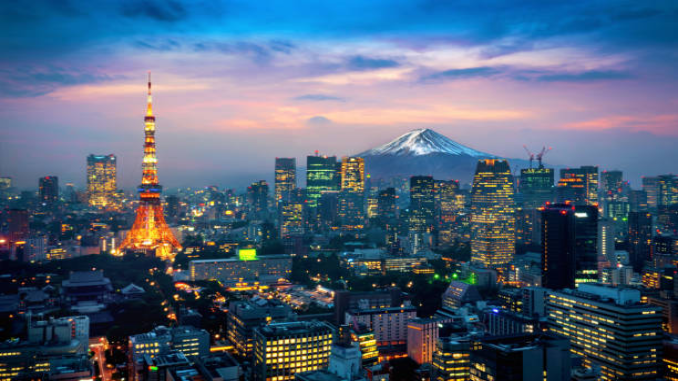

In [5]:
cv2_imshow(bg2_image)

In [23]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    print(difference_three_channel.shape)
    cv2_imshow(difference_three_channel)

    #Concatenate the 3 channels into 1
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    print(difference_single_channel.shape)
    cv2_imshow(difference_single_channel)
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

(381, 678, 3)


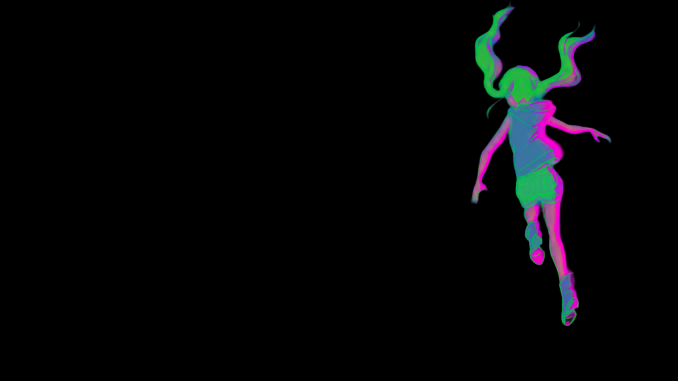

(381, 678)


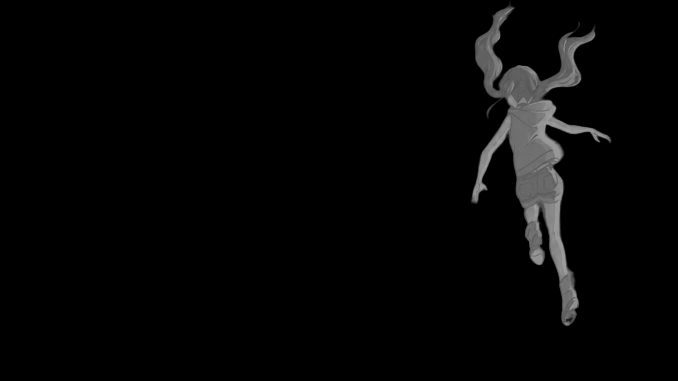

--------


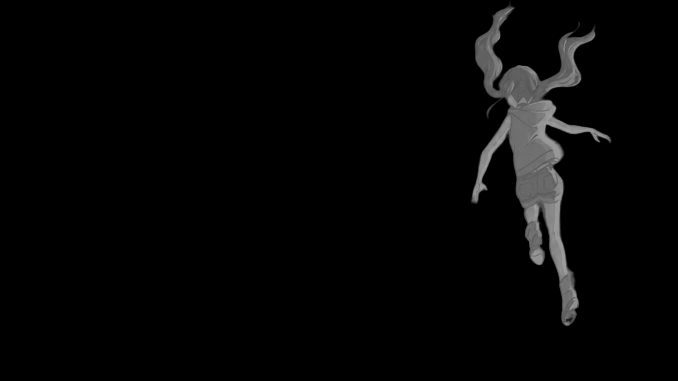

In [24]:
difference_single_channel = computeDifference(bg1_image, ob_image)
print('--------')
cv2_imshow(difference_single_channel)

### We need to convert all into binary image for easy manipulation

In [33]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 10, 255, 0) # if the pixel >= 10, pixel = 255 else 0
    cv2_imshow(difference_binary)

    # Create fake channel
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

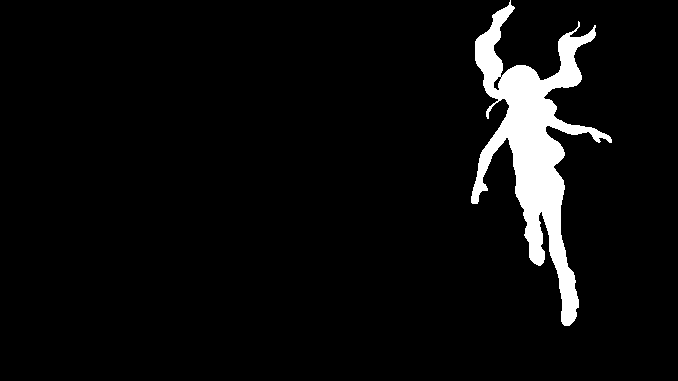

----


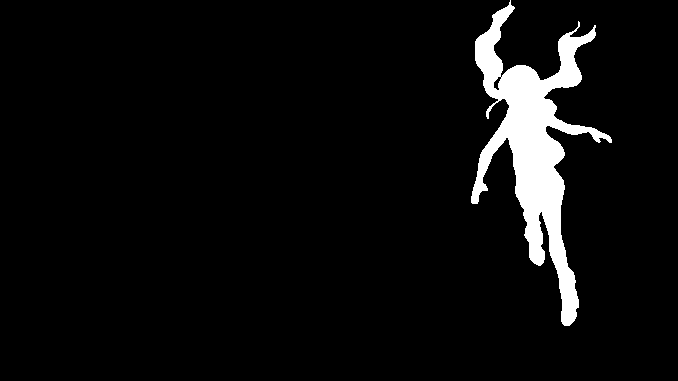

In [29]:
binary_mask = computeBinaryMask(difference_single_channel)
print('----')
cv2_imshow(binary_mask)

In [30]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)

    #Replace the background with the object, if the pixel is black (255), replace with the object else target background
    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

(381, 678, 3)


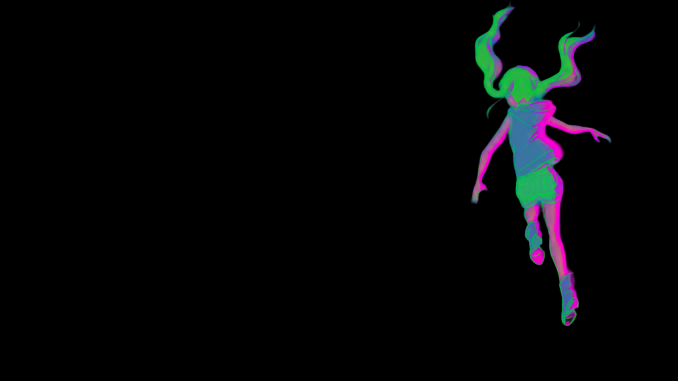

(381, 678)


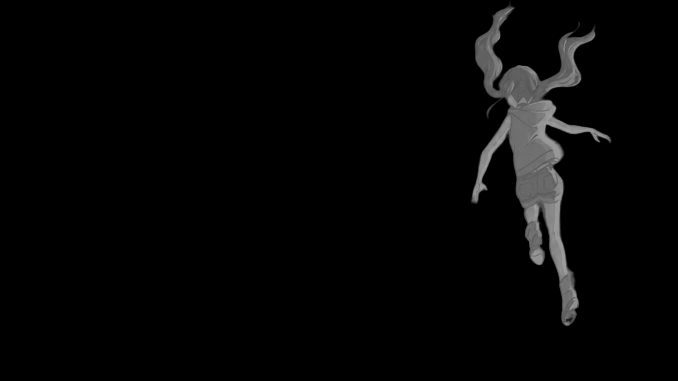

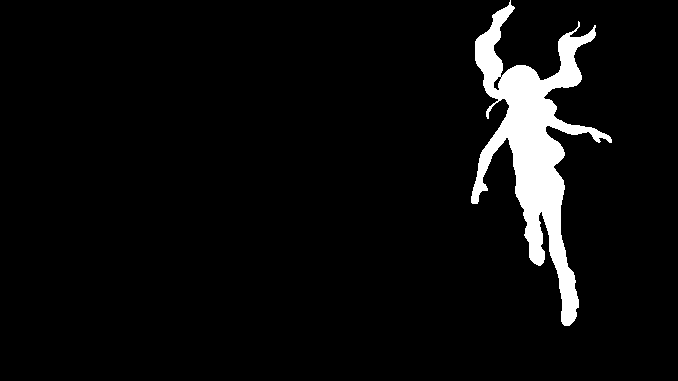

----


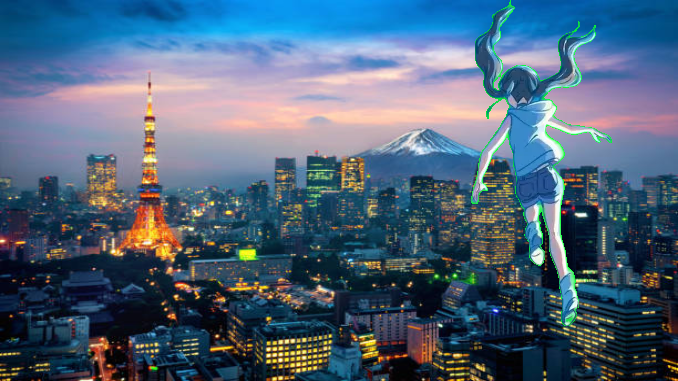

In [32]:
output = replaceBackGround(bg1_image, bg2_image, ob_image)
print('----')
cv2_imshow(output)